## loading and initial filtering

In [1]:
import json

# Load the JSON file
file_path = "C:/Users/guest_temp/Desktop/yehonatan/recsys/recsys_data_and_test_files/items_metadata.jsonl"  # Replace with the actual path to your JSON file

with open(file_path, "r") as file:
    data = [json.loads(line) for line in file]

# Check the total number of records
print(f"Number of records: {len(data)}")

# Explore the first record
print("First record:")
print(json.dumps(data[2002], indent=2))  # Pretty print the first record

# Explore the structure of all keys in the first record
print("Keys in the first record:")
print(data[0].keys())


Number of records: 220890
First record:
{
  "main_category": "AMAZON FASHION",
  "title": "Ryka Women's Vida RZX",
  "average_rating": 4.3,
  "rating_number": 827,
  "features": [
    "Made in the USA and Imported",
    "Rubber sole",
    "Heel measures approximately 0.75\"",
    "RE-ZORB high impact cushion in the heel & Ultra Flex forefoot; the best in cushioning and flexibility",
    "Breathable mesh with supportive synthetic overlays",
    "Rubber outsole with pivot point and strategic flex grooves",
    "Anatomical Precise-Return footbed"
  ],
  "description": [
    "The Vida RZX features the RZX technology platform. With Ultra Flex in the forefoot, the alternating flex grooves on the top and bottom of the midsole, and in the rubber outsole, RZX reduces forefoot pressure during workouts. The RE-ZORB\u00ae in the heel is designed to absorb impact and provide cushion all the way to the flex zone."
  ],
  "price": 42.14,
  "images": [
    {
      "thumb": "https://m.media-amazon.com/

In [2]:
# making a filtered jsonl with the informative keys
# Load the JSONL file
file_path = "C:/Users/guest_temp/Desktop/yehonatan/recsys/recsys_data_and_test_files/items_metadata.jsonl"

with open(file_path, "r") as file:
    data = [json.loads(line) for line in file]

# the keys we moves out are ['images', 'videos', 'bought_together']
# Define the keys to keep
keys_to_keep = [
    "main_category", "title", "average_rating", "rating_number", "features",
    "description", "price", "store", "categories", "details", "parent_asin"
]

# Filter the data
filtered_data = [
    {key: record[key] for key in keys_to_keep if key in record}
    for record in data
]

In [453]:
filtered_data[560]

{'main_category': 'AMAZON FASHION',
 'title': 'Kate Bissett Stylish Birthstone Stackables Swarovski Crystal Eternity Bands',
 'average_rating': 4.3,
 'rating_number': 2670,
 'features': ['Genuine Rhodium Plated Channel Set Eternity Band with Assorted Crystal Colors Polished into a Lustrous Silvertone Finish',
  'Swarovski Crystal',
  'ETERNAL LOVE – Display your Eternal love for your sweetheart with our stylish and timeless eternity bands. Style: Eternity Channel Set Swarovski Crystal Stackable Birthstone Ring',
  '22 mm L x 3 mm W x 2 mm H Lead Free Alloy',
  "Makes the perfect gift for any awesome lady. Great gifts for Mom, daughters or Grandma on Mother's Day, anniversary, Birthday, Wedding celebration, Formals, or Proms."],
 'description': [],
 'price': 11.99,
 'store': 'Kate Bissett',
 'categories': ['Clothing, Shoes & Jewelry',
  'Women',
  'Jewelry',
  'Rings',
  'Stacking'],
 'details': {'Department': 'Womens',
  'Date First Available': 'July 13, 2016',
  'Manufacturer': 'Icon'

## Null values analysis

In [4]:
# Find records where the values of a key is None or missing
def null_val_count_and_parent_asin_lst(key):
    null_values_records = [record for record in filtered_data if not record.get(key)]
    # Count the records with null main_category
    null_count = len(null_values_records)
    parent_asins_with_null_values = [record.get('parent_asin') for record in null_values_records]
    return null_count, parent_asins_with_null_values

In [5]:
keys_lst = ["main_category", "title", "average_rating", "rating_number", "features","description", "price", "store", "categories", "details", "parent_asin"]


In [6]:
for key in keys_lst:
    null_count, parent_asin_lst = null_val_count_and_parent_asin_lst(key)
    print(f"Number of records with null {key}: {null_count}")
    

Number of records with null main_category: 6393
Number of records with null title: 9
Number of records with null average_rating: 0
Number of records with null rating_number: 0
Number of records with null features: 5337
Number of records with null description: 119440
Number of records with null price: 60197
Number of records with null store: 757
Number of records with null categories: 0
Number of records with null details: 2307
Number of records with null parent_asin: 0


In [7]:
# we will use the following function, to get some intuition about the the items with different null values
# for example - understand if we can use the other perts of the item metadata, to fill the title if its null.

null_title_count, null_title_parent_asin_lst = null_val_count_and_parent_asin_lst('title')

def get_item_by_parent_asin(parent_asin, data):
    """
    Retrieve the full record of an item using its parent_asin.
    
    Args:
        parent_asin (str): The parent ASIN to search for.
        data (list): The dataset (list of dictionaries).
    
    Returns:
        dict or None: The matching record, or None if not found.
    """
    for record in data:
        if record.get("parent_asin") == parent_asin:
            return record
    return None

# Example usage
parent_asin_to_find = null_title_parent_asin_lst[0]  # Replace with the ASIN you're searching for
result = get_item_by_parent_asin(parent_asin_to_find, filtered_data)

if result:
    print("Item found:")
    print(json.dumps(result, indent=4))
else:
    print(f"No item found with parent_asin: {parent_asin_to_find}")

Item found:
{
    "main_category": "AMAZON FASHION",
    "title": "",
    "average_rating": 3.8,
    "rating_number": 36,
    "features": [
        "Imported",
        "Date window at 3:00",
        "Gold dial with black, green and white hands, black and white hour markers; luminous; 18K gold ion-plated stainless steel bezel with black and green top ring; flame fusion crystal; 18K gold ion-plated stainless steel case; black polyurethane strap",
        "Japanese-quartz Movement",
        "Case Diameter: 48mm",
        "Water Resistant To 330 Feet"
    ],
    "description": [
        "Created in a blend of fashion and class, this Invicta timepiece exhibits a bold style that adds flare to your collection."
    ],
    "price": null,
    "store": "Invicta",
    "categories": [
        "Clothing, Shoes & Jewelry",
        "Men",
        "Watches",
        "Wrist Watches"
    ],
    "details": {
        "Is Discontinued By Manufacturer": "No",
        "Package Dimensions": "6.3 x 4.8 x 3.8 i

#### fill null title valus by manually searching the internet

In [9]:
#Title null manually fill null:
title_fillna_dict =  {"B01487XPV6": "Invicta Watch 21446",# https://www.amazon.co.jp/%E3%82%A4%E3%83%B3%E3%83%B4%E3%82%A3%E3%82%AF%E3%82%BF-Invicta-21446-Display-Japanese/dp/B01487XPV6
                      "B003DIHBEY": "XOXO Women's XO115 Black Enamel and Rhinestone Accent Bracelet Watch", # http://www.jewelrylife.com/product/xoxo-women-s-xo115-rhinestone-accent-black-enamel-bracelet-watch
                      "B0BB5WV2GZ": "QAZW Womens Ankle Boots Pointed Toe Stacked Chunky Heel Slip on Chelsea Short Booties", # https://www.amazon.co.uk/QAZW-Pointed-Stacked-Chelsea-Booties/dp/B09H5WTG8S
                      "B00444YGJ4": "Invicta Women's 0137 Wildflower Collection 18k Gold-Plated Stainless Steel Watch", # https://www.amazon.com.mx/Invicta-0137-Wildflower-Collection-Gold-Plated/dp/B00444YGJ4
                      "B07PLFHD24": "Nomad Women's Puddles Rain Boot", # https://www.nomadfootwear.com/category/women/boots/puddles-retro-floral.html, https://www.amazon.com/Nomad-Womens-Puddles-Rain-Boot/dp/B07W6XTDRZ?th=1 
                      "B077P8NMB3": "Sterling Silver Opal Stud Earrings for Women Solitaire 6x8mm Oval Cut Opal Gemstone Earrings for Girls",# https://www.amazon.ae/Michooyel-Sterling-Earrings-Birthstone-Gemstone/dp/B075F5GMKT?th=1
                      "B0B3ZRHMTC": "DC Comics Robin Big Girls Cosplay T-Shirt Dress Leggings and Cape 3 Piece Black/Red 10-12", # https://www.amazon.com/DC-Comics-Cosplay-T-Shirt-Leggings/dp/B0B3ZRHMTC
                      "B00P7OZ99G": "Beautiful Bead Golden Corn Chain Link Rhinestones Long Tail Fox Pendant Necklace for Women(1Pcs)", # https://www.amazon.ca/Beautiful-Bead-Rhinestones-Pendant-Necklace/dp/B00OZAEEDK
                      "B017HAE3O4": "Country Bound Silicone Wedding Ring 5 Pack, Premium Quality Wedding-Bands for Active Women, Sports, Gym and Work Comfortable Fit & Skin Safe, Antibacterial. 7" # https://www.amazon.ae/Country-Bound-Wedding-Bands-Comfortable-Antibacterial/dp/B017HAE3O4
                     }

In [10]:
## repleicing the null title values with the relevant values

In [11]:

def fill_null_titles(data, asin_title_dict):
    """
    Fill null (None) title values in the dataset using a dictionary of parent_asin-to-title mappings.

    Args:
        data (list): The dataset (list of dictionaries).
        asin_title_dict (dict): A dictionary mapping parent_asin to title.

    Returns:
        list: The updated dataset with filled title values.
    """
    for record in data:
        # Check if the title is None and if parent_asin exists in the mapping
        if record.get("title") is None or record.get("title") == "":
            parent_asin = record.get("parent_asin")
            if parent_asin in asin_title_dict:
                record["title"] = asin_title_dict[parent_asin]
    return data


# Update the filtered_data
filtered_data = fill_null_titles(filtered_data, title_fillna_dict)

#### fill null main category valus

In [21]:
null_main_category_count, null_main_category_parent_asin_lst = null_val_count_and_parent_asin_lst('main_category')

In [27]:
# check if all the items with null main category have the same sub category
# we can compare the number we will get with the number of items with null main_category we got earlier
counter = 0
for item in filtered_data:
    if (item.get("parent_asin") in null_main_category_parent_asin_lst) and (item.get("categories")[0] == "Clothing, Shoes & Jewelry"):
        counter += 1
counter

6387

#### we can conclude that the all the null main_categories will get the value AMAZON FASHION

In [30]:
## repleicing the null main_category values with AMAZON FASHION values

In [32]:
def fill_null_main_categories(data, main_category):
    """
    Fill null (None) main_category values in the dataset

    Args:
        data (list): The dataset (list of dictionaries).
        main_category value to fill.

    Returns:
        list: The updated dataset with filled main_category values.
    """
    for record in data:
        # Check if the title is None and if parent_asin exists in the mapping
        if record.get("main_category") is None or record.get("main_category") == "":
            record["main_category"] = main_category
    return data


# Update the filtered_data
filtered_data = fill_null_main_categories(filtered_data, "AMAZON FASHION")

In [34]:
counter_mc = 0
for record in filtered_data:
    # Check if the title is None and if parent_asin exists in the mapping
    if record.get("main_category") is None or record.get("main_category") == "":
        counter_mc += 1
counter_mc

0

#### fill null store values

In [37]:
# we can see that the number of null store value is low, we can just fill it with "Amazon"

In [39]:
## repleicing the null store values with the relevant values

In [41]:
def fill_null_stores(data, store):
    """
    Fill null (None) store values in the dataset

    Args:
        data (list): The dataset (list of dictionaries).
        store value to fill.

    Returns:
        list: The updated dataset with filled store values.
    """
    for record in data:
        # Check if the title is None and if parent_asin exists in the mapping
        if record.get("store") is None or record.get("store") == "":
            record["store"] = store
    return data


# Update the filtered_data
filtered_data = fill_null_stores(filtered_data, "Amazon")

In [127]:
# save the filtered_data as json

with open("filtered_metadata.jsonl", "w") as f:
    f.writelines([json.dumps(product) + "\n" for product in filtered_data])

## main_categories analysis

In [44]:
# Extract all 'main_category' values
main_categories = {record['main_category'] for record in filtered_data if 'main_category' in record}

# Check if all 'main_category' values are the same
if len(main_categories) == 1:
    print(f"All items have the same main category: {main_categories.pop()}")
else:
    print(f"Different main categories found: {main_categories}")

Different main categories found: {'Movies & TV', 'Musical Instruments', 'Health & Personal Care', 'Grocery', 'Toys & Games', 'All Electronics', 'Unique Finds', 'Amazon Devices', 'Video Games', 'Home Audio & Theater', 'Camera & Photo', 'All Beauty', 'Car Electronics', 'Premium Beauty', 'AMAZON FASHION', 'Automotive', 'Appliances', 'GPS & Navigation', 'Cell Phones & Accessories', 'Sports & Outdoors', 'Computers', 'Baby', 'Books', 'Tools & Home Improvement', 'Industrial & Scientific', 'Office Products', 'Collectible Coins', 'Arts, Crafts & Sewing', 'Handmade', 'Amazon Home'}


Main Category Distribution:
AMAZON FASHION: 209035
All Beauty: 1074
Amazon Home: 2219
Toys & Games: 1775
Sports & Outdoors: 2315
Computers: 111
Industrial & Scientific: 223
Health & Personal Care: 662
Automotive: 177
Office Products: 553
Arts, Crafts & Sewing: 398
All Electronics: 69
Baby: 207
Tools & Home Improvement: 1574
Cell Phones & Accessories: 179
Books: 224
Video Games: 5
Grocery: 11
Handmade: 21
Musical Instruments: 26
Camera & Photo: 11
Appliances: 4
Amazon Devices: 2
Premium Beauty: 1
GPS & Navigation: 1
Home Audio & Theater: 4
Unique Finds: 2
Movies & TV: 4
Collectible Coins: 2
Car Electronics: 1


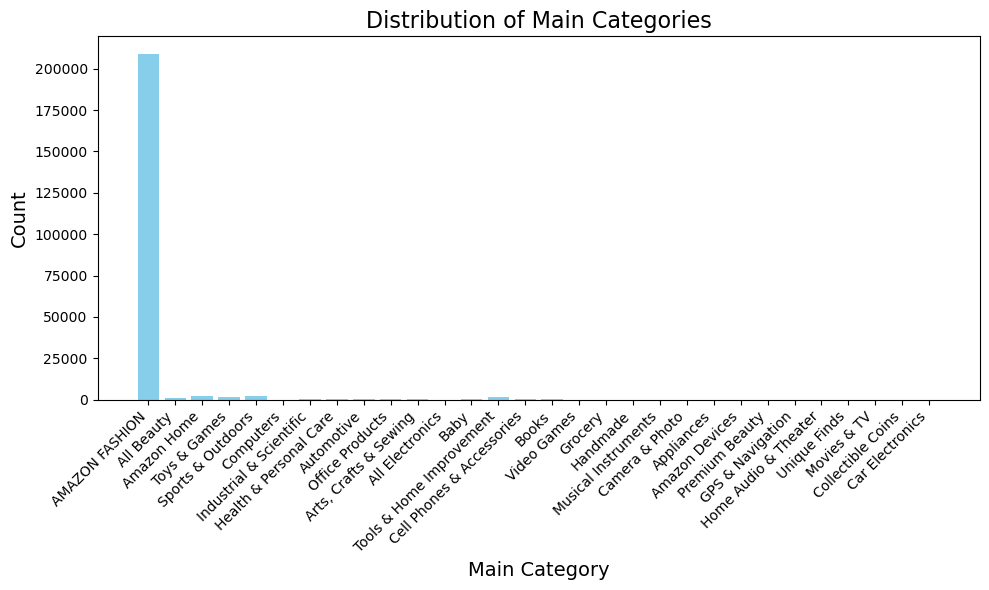

In [46]:
# main category distribution over the items
import matplotlib.pyplot as plt
from collections import Counter

# Filter out records with None as the main_category
filtered_main_categories = [record['main_category'] for record in filtered_data if record.get('main_category')]

# Count the occurrences of each main category
main_category_counts = Counter(filtered_main_categories)

# Print the distribution
print("Main Category Distribution:")
for category, count in main_category_counts.items():
    print(f"{category}: {count}")

# Barplot
plt.figure(figsize=(10, 6))
plt.bar(main_category_counts.keys(), main_category_counts.values(), color='skyblue')
plt.title('Distribution of Main Categories', fontsize=16)
plt.xlabel('Main Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

we can see that most of the data is an AMAZON FASHION category - so its irrelevant to make a Bias parameter out of it.

## stores analysis

In [51]:
# Extract all 'main_category' values
stores = {record['store'] for record in filtered_data if 'store' in record}

# Check if all 'main_category' values are the same
if len(stores) == 1:
    print(f"All items have the same main category: {stores.pop()}")
else:
    print(f"Different main categories found: {stores}")

Different main categories found: {'SCHOOL ISSUE', 'Little Treasure', 'Nicute', 'JL LITTLE FOREST', 'KINGSIN', 'GURUNVANI', 'EGOOG', 'Puadun', 'JustOneStyle', 'Sureio', 'Aoowoll', 'Next Level Apparel', 'WonderWink', "SOCKS'NBULK", 'Soul Statement', 'LANSA', 'K8 Creates', 'Maven Gifts', 'SONTHIN', 'DreamWorks', 'UPRIMOR', 'shermie', 'iJewelry2', 'iFLY Luggage', 'Little Blue House by Hatley', 'MZYSJZS', 'S TallSlim Tees', 'dirafy', 'CNFUFEN', 'Thanps', 'Beads Hunter Jewelry', 'Abington Lane', 'All-Ewired-Up Gifts', 'Charmylo', 'Bamans', 'JENN ARDOR', 'Myia Passiello', 'Bricraft', 'Plffkfly', 'Southwest Boutique', 'SIVITE', 'FSIGOM', 'HUSKARY', 'Vivitulip', 'Wolancy', 'ROLILASON（罗赖拉尚）', 'INNKER', 'DBR Tech', 'BluBlocker', 'Postropaky', 'Soulomelody', 'EZ Feet', 'MIMIDI', 'VOARYISA', 'Papo', 'jinxiuge', 'FEELIN', 'CHARLES RICHARDS', 'HOP FASHION', 'AIYUENCICI', 'Baja Direct', 'WOWULOVELY', 'Iandroiy', 'Unlisted by Kenneth Cole', 'Collsants', 'LSLYA', 'fashionon', 'Zubits', 'Rasta/NYE', 'VAT

In [53]:
# stores distribution over the items
from collections import Counter

# Filter out records with None as the main_category
filtered_stores = [record['store'] for record in filtered_data if record.get('store')]

# Count the occurrences of each main category
stores_counts = Counter(filtered_stores)

# Print the distribution
print("Stores Distribution:")
stores_counts

Stores Distribution:


Counter({'Skechers': 1890,
         'adidas': 1432,
         'Hanes': 1430,
         'Amazon Essentials': 1366,
         'Under Armour': 1325,
         'New Balance': 1318,
         'Clarks': 1032,
         'Crocs': 982,
         'Amazon Collection': 907,
         'Amazon': 850,
         "Rubie's": 799,
         'Columbia': 787,
         'Nike': 763,
         'Disney': 691,
         'Carhartt': 678,
         'Fruit of the Loom': 649,
         'Casio': 605,
         'Champion': 599,
         'ASICS': 596,
         'Allegra K': 586,
         'Calvin Klein': 575,
         'Invicta': 518,
         'Merrell': 512,
         'PUMA': 507,
         'Timex': 491,
         'Reebok': 485,
         'Dickies': 482,
         'Tommy Hilfiger': 477,
         "Levi's": 465,
         'COOFANDY': 423,
         'PattyBoutik': 410,
         'DREAM PAIRS': 409,
         'Forum Novelties': 406,
         'Ekouaer': 402,
         'California Costumes': 357,
         'Disguise': 328,
         'Lee': 327,
       

In [136]:
stores_counts_values = list(stores_counts.values())

In [188]:
import seaborn as sns
def plot_histogram(data, bins=200, color='skyblue', kde=True, title="Number of Stores with n items", xlabel="Number of items", ylabel="Number of Stores"):
    """
    Plots a customized histogram using Seaborn.

    Parameters:
        data (array-like): The data to plot.
        bins (int): Number of bins for the histogram.
        color (str): Color of the bars.
        kde (bool): Whether to overlay a Kernel Density Estimate (KDE) curve.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    # Set the Seaborn style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=bins, color=color, kde=kde)

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

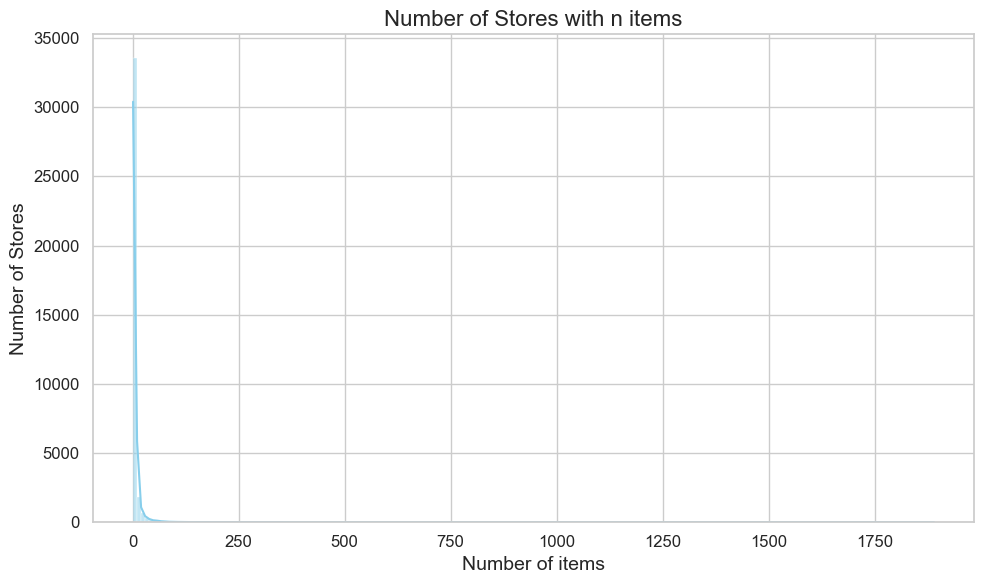

In [190]:
plot_histogram(stores_counts_values)

In [180]:
stores_counts_values_less_then_5 = [i for i in stores_counts_values if i < 5]

In [182]:
stores_counts_values_5_to_30 = [i for i in stores_counts_values if i >= 5 and i <= 30]

In [184]:
stores_counts_values_more_then_30 = [i for i in stores_counts_values if i > 30]

In [186]:
print(f"the number of stores overall is: {len(stores_counts_values)}")
print(f"the number of stores with less then 5 items: {len(stores_counts_values_less_then_5)}")
print(f"the number of stores with 5 to 30 items: {len(stores_counts_values_5_to_30)}")
print(f"the number of stores with more then 30 items: {len(stores_counts_values_more_then_30)}")

the number of stores overall is: 37137
the number of stores with less then 5 items: 28674
the number of stores with 5 to 30 items: 7427
the number of stores with more then 30 items: 1036


## Title Analysis

In [207]:
titles_lens = [len(record['title']) for record in filtered_data if 'title' in record]

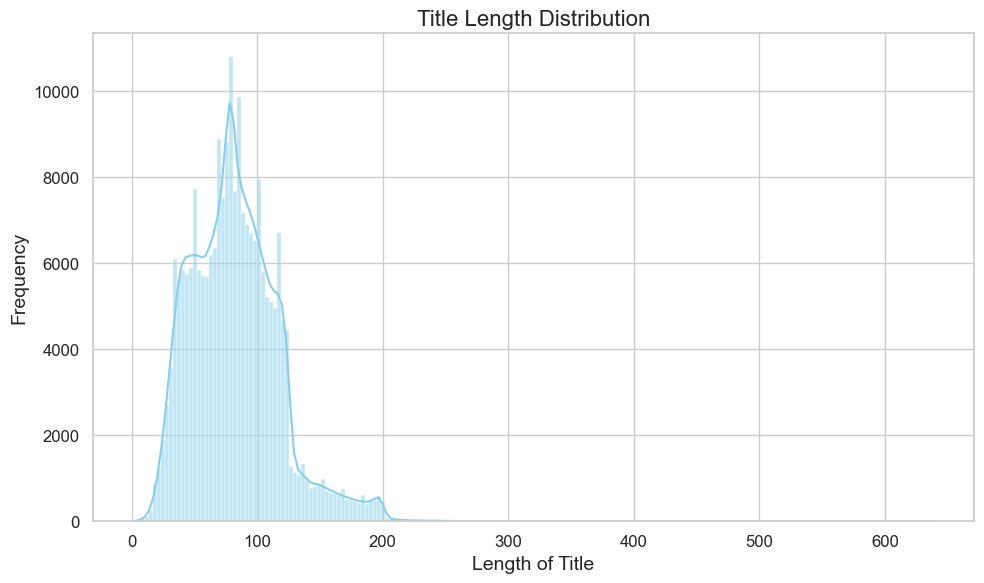

In [211]:
plot_histogram(titles_lens, title="Title Length Distribution", xlabel="Length of Title", ylabel="Frequency")

In [243]:
titles_less_then_3 = [record['title'] for record in filtered_data if 'title' in record and len(record['title']) < 3]

In [245]:
len(titles_less_then_3)

1

In [247]:
titles_more_then_200 = [record['title'] for record in filtered_data if 'title' in record and len(record['title']) >200]

In [251]:
len(titles_more_then_200)

444

## Features Analysis

In [237]:
features_lens = [len("".join(record['features'])) for record in filtered_data if 'features' in record]

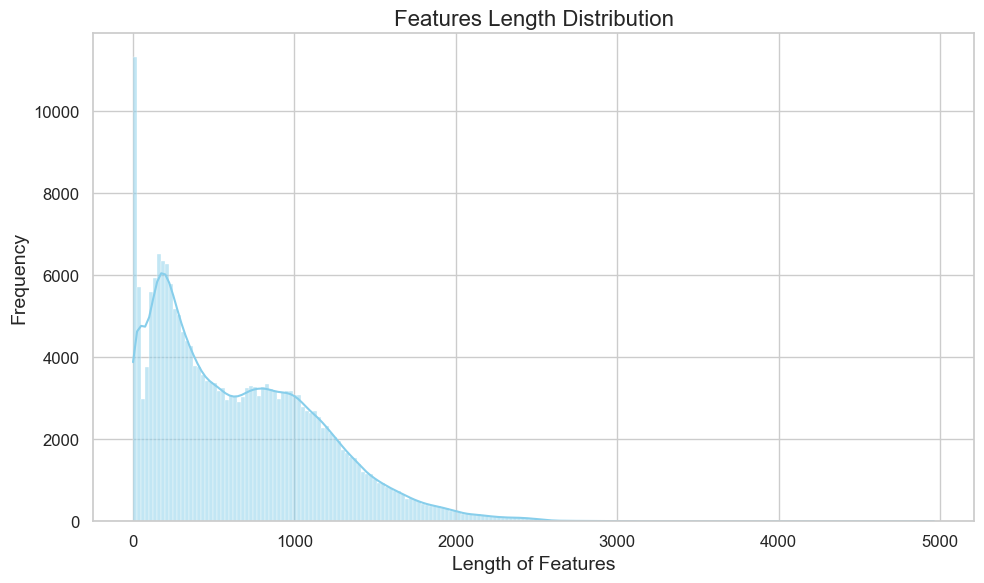

In [241]:
plot_histogram(features_lens, title="Features Length Distribution", xlabel="Length of Features", ylabel="Frequency")

In [259]:
features_less_then_3 = ["".join(record['features']) for record in filtered_data if 'features' in record and len("".join(record['features'])) < 3]

In [261]:
len(features_less_then_3)

5343

In [293]:
features_more_then_2500 = ["".join(record['features']) for record in filtered_data if 'features' in record and len("".join(record['features'])) >2500]

In [295]:
len(features_more_then_2500)

317

## Description Analysis

In [277]:
description_lens = [len("".join(record['description'])) for record in filtered_data if 'description' in record]

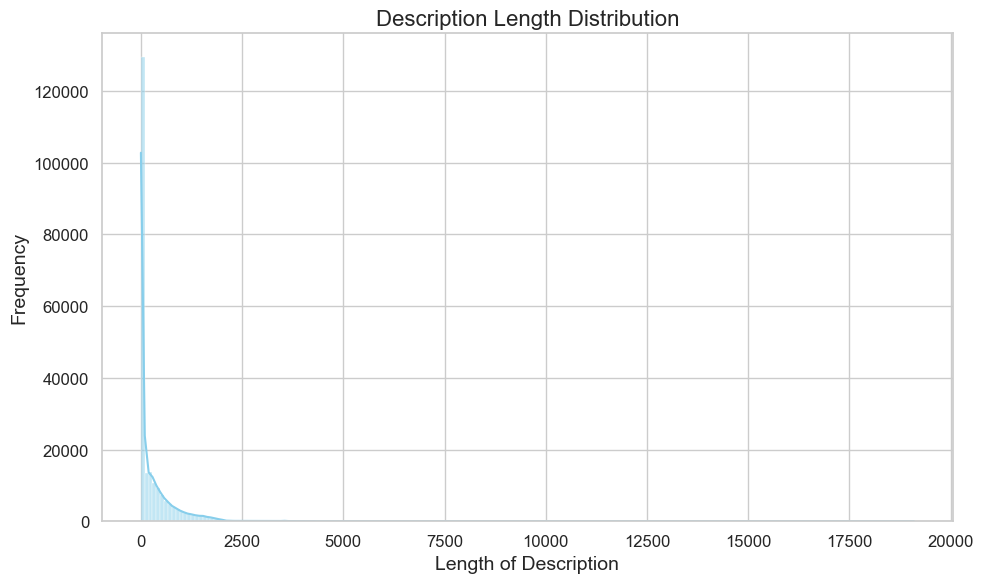

In [279]:
plot_histogram(description_lens, title="Description Length Distribution", xlabel="Length of Description", ylabel="Frequency")

In [285]:
description_less_then_3 = ["".join(record['description']) for record in filtered_data if 'description' in record and len("".join(record['description'])) < 3]

In [291]:
len(description_less_then_3)

119488

In [309]:
features_more_then_2500 = ["".join(record['description']) for record in filtered_data if 'description' in record and len("".join(record['description'])) >2500]

In [311]:
len(features_more_then_2500)

1571

## Details Analysis

In [318]:
details_lens = [len("; ".join(f"{key}{":"}{value}" for key, value in record['details'].items())) for record in filtered_data if 'details' in record]

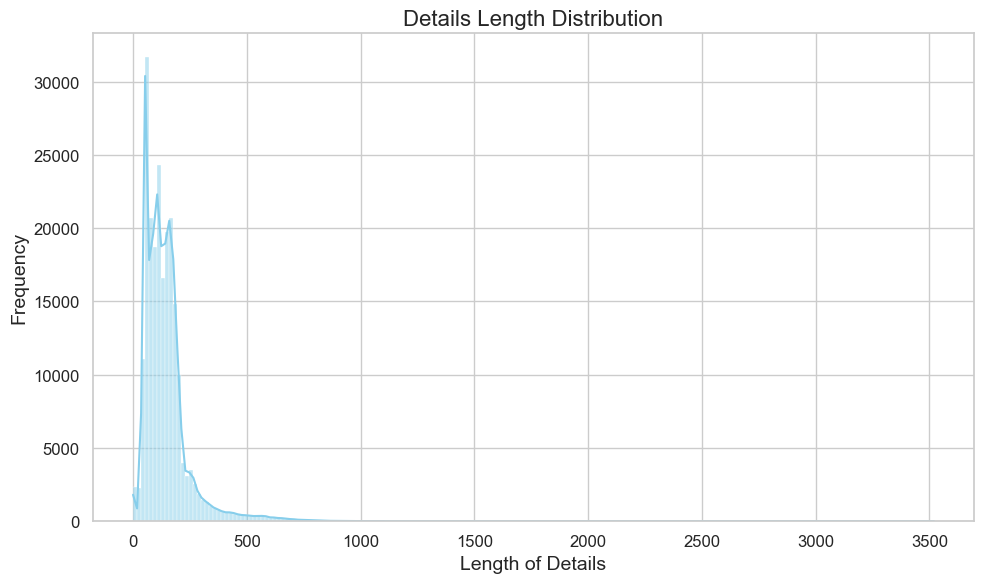

In [324]:
plot_histogram(details_lens, title="Details Length Distribution", xlabel="Length of Details", ylabel="Frequency")

In [326]:
description_less_then_3 = ["; ".join(f"{key}{":"}{value}" for key, value in record['details'].items()) for record in filtered_data if 'details' in record and len("; ".join(f"{key}{":"}{value}" for key, value in record['details'].items())) < 3]

In [328]:
len(description_less_then_3)

2307

In [330]:
features_more_then_600 = ["; ".join(f"{key}{":"}{value}" for key, value in record['details'].items()) for record in filtered_data if 'details' in record and len("; ".join(f"{key}{":"}{value}" for key, value in record['details'].items())) > 600]

In [332]:
len(features_more_then_600)

2096

## Average Rating Analysis

In [340]:
avg_ratings = [record['average_rating'] for record in filtered_data if 'average_rating' in record]

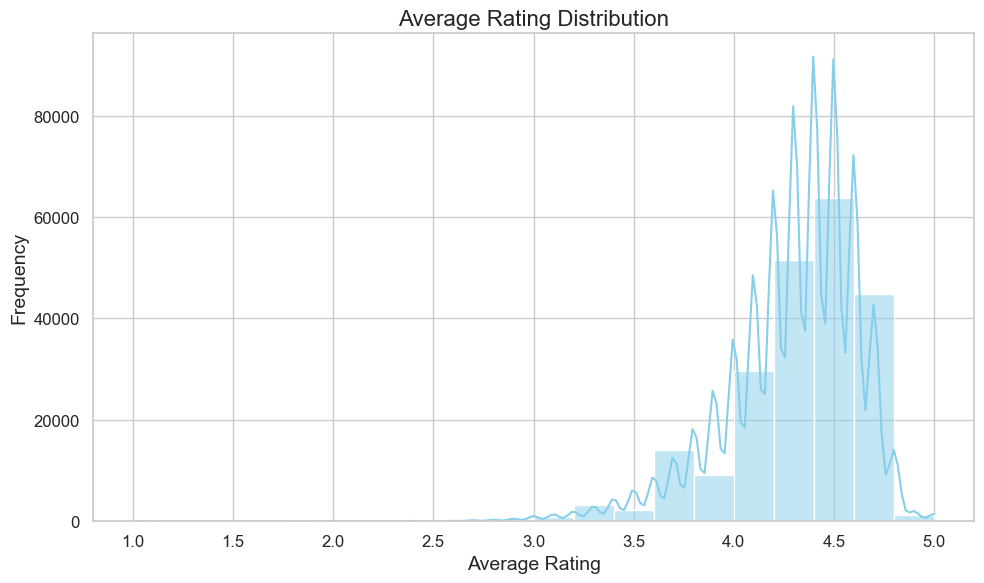

In [350]:
plot_histogram(avg_ratings,bins=20, title="Average Rating Distribution", xlabel="Average Rating", ylabel="Frequency")

## Rating Number Analysis

In [352]:
num_ratings = [record['rating_number'] for record in filtered_data if 'rating_number' in record]

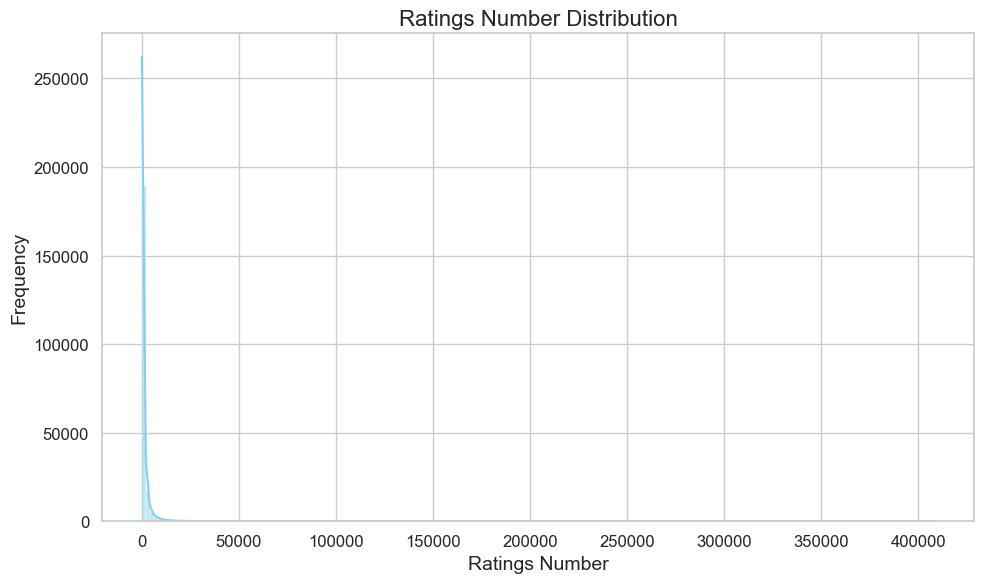

In [360]:
plot_histogram(num_ratings,bins=200, title="Ratings Number Distribution", xlabel="Ratings Number", ylabel="Frequency")

## Price Analysis

In [389]:
prices = [record['price'] for record in filtered_data if 'price' in record and type(record['price']) == float]

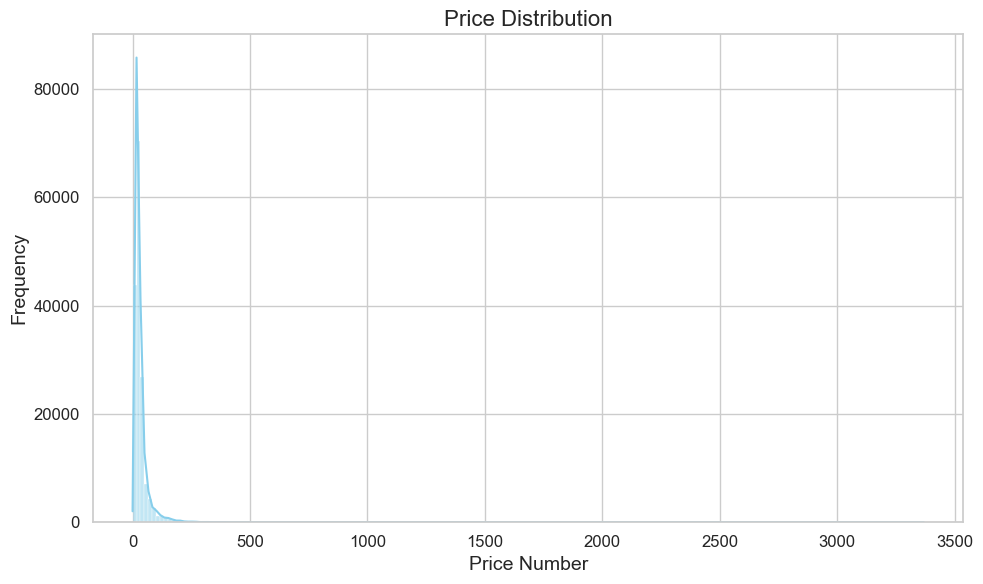

In [391]:
plot_histogram(prices,bins=200, title="Price Distribution", xlabel="Price Number", ylabel="Frequency")

In [403]:
prices_less_then_10 = [record['price'] for record in filtered_data if 'price' in record and type(record['price']) == float and record['price'] < 10]

In [405]:
len(prices_less_then_10)

13575

In [413]:
prices_more_then_200 = [record['price'] for record in filtered_data if 'price' in record and type(record['price']) == float and record['price'] > 200]

In [415]:
len(prices_more_then_200)

943

In [417]:
prices_less_then_200 = [record['price'] for record in filtered_data if 'price' in record and type(record['price']) == float and record['price'] <= 200]

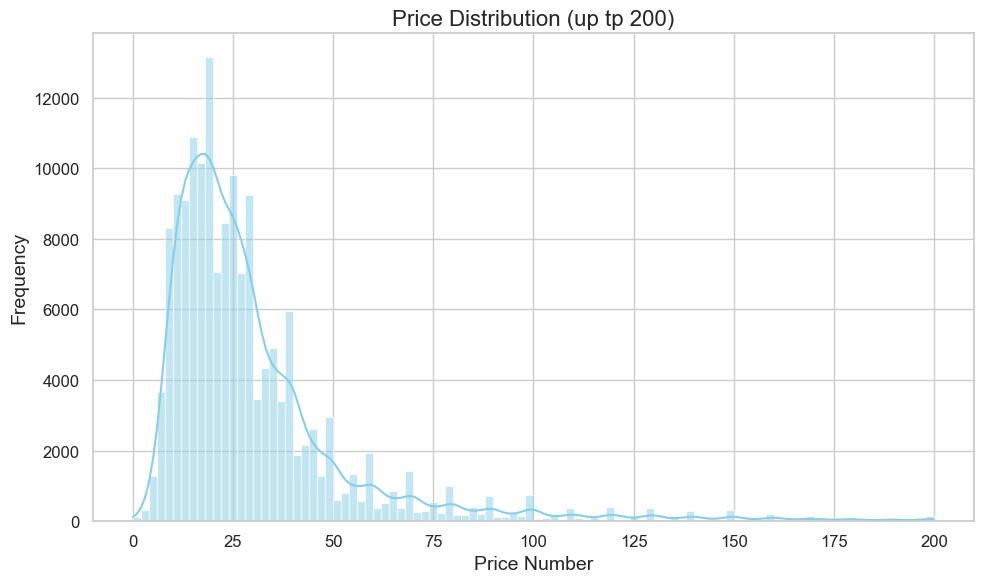

In [423]:
plot_histogram(prices_less_then_200,bins=100, title="Price Distribution (up tp 200)", xlabel="Price Number", ylabel="Frequency")

## Biases

#### store size bias

In [57]:
import pandas as pd
# Convert the metadata json into a Pandas DataFrame
df_metadata = pd.DataFrame(filtered_data)

In [61]:
# here we will add a "srore_size" column to anable store size bias
# Function to categorize store size
def categorize_store_size(count):
    if count > 30:
        return "large"
    elif 5 <= count <= 30:
        return "medium"
    else:
        return "small"

# Map store counts to the DataFrame and categorize
df_metadata["store_count"] = df_metadata["store"].map(stores_counts)
df_metadata["store_size"] = df_metadata["store_count"].apply(categorize_store_size)

# Drop the intermediate column if not needed
df_metadata = df_metadata.drop(columns=["store_count"])

In [63]:
df_metadata

,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin,store_size
0,AMAZON FASHION,BALEAF Women's Long Sleeve Zip Beach Coverup U...,4.2,422,"[90% Polyester, 10% Spandex, Zipper closure, M...",[],31.99,BALEAF,"[Clothing, Shoes & Jewelry, Women, Clothing, S...","{'Department': 'womens', 'Date First Available...",B09X1MRDN6,large
1,AMAZON FASHION,"SAS Women's, Relaxed Sandal",4.7,618,"[Made in the USA, Suede sole, Heel measures ap...","[Unwind, leave your worries behind, and simply...",188.95,SAS,"[Clothing, Shoes & Jewelry, Women, Shoes, Sand...",{'Product Dimensions': '10 x 15 x 6 inches; 2 ...,B0944VG4Y4,medium
2,AMAZON FASHION,SheIn Women's Basic Stretch Plaid Mini Bodycon...,3.8,999,"[Zipper closure, Fabric has some stretch; Plea...",[],12.99,SheIn,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","{'Department': 'womens', 'Date First Available...",B08JGGF5TJ,large
3,AMAZON FASHION,Amazon Essentials Women's Surplice Dress (Avai...,4.4,7096,"[95% Viscose, 5% Elastane, Imported, No Closur...",[Amazon Essentials is focused on creating affo...,19.92,Amazon Essentials,"[Clothing, Shoes & Jewelry, Women, Clothing, D...","{'Item model number': 'AE1932668', 'Department...",B096HDRB6R,large
4,AMAZON FASHION,"Fotociti Yoga Shorts for Women – 5"" High Waist...",4.5,2911,"[92% Polyester, 8% Spandex, Imported, Pull On ...",[],15.99,Fotociti,"[Clothing, Shoes & Jewelry, Women, Clothing, A...",{'Package Dimensions': '10 x 8 x 0.6 inches; 7...,B089YJ8P6X,small
...,...,...,...,...,...,...,...,...,...,...,...,...
220885,AMAZON FASHION,weryerker 7 Chakra GemStones Empty Necklace Co...,4.7,302,[【Chakra Healing Crystals Set】 - the package i...,[],9.92,weryerker,"[Clothing, Shoes & Jewelry, Women, Jewelry, Ne...","{'Department': 'womens', 'Date First Available...",B0B5L18YMS,small
220886,AMAZON FASHION,Bukesiyi Sasquatch Hat Bigfoot Embroidered Tru...,4.8,54,"[65% Polyester, 35% Cotton, 进口, Snap closure, ...",[],16.99,Bukesiyi,"[Clothing, Shoes & Jewelry, Men, Accessories, ...",{'Product Dimensions': '10.2 x 7.8 x 4.6 inche...,B0B8VTSJTJ,small
220887,AMAZON FASHION,4 Pairs Bohemian Vintage Dangle Earrings Retro...,4.5,5874,[Package Includes: you will receive 4 pairs of...,[],9.99,meekoo,"[Clothing, Shoes & Jewelry, Women, Jewelry, Ea...","{'Date First Available': 'May 10, 2023', 'Manu...",B0C4TC78JH,medium
220888,AMAZON FASHION,Steve Madden Men's Troopah-c Combat Boot,3.7,225,"[100% Leather, Imported, Synthetic sole, Shaft...","[Rugged, well-worn leather adds vintage appeal...",114.07,Steve Madden,"[Clothing, Shoes & Jewelry, Men, Shoes, Boots,...","{'Item Weight': '1.19 Pounds', 'Item model num...",B075Y7SBK1,large


## categories analysis and category bias

In [65]:
# max level of deepness of categories
max_len = 0
for elem in list(df_metadata["categories"]):
    len_elem = len(elem)
    if len_elem > max_len:
        max_len = len_elem
    else:
        continue
print(max_len)

8


In [67]:
# min level of deepness of categories
min_len = 8
for elem in list(df_metadata["categories"]):
    len_elem = len(elem)
    if len_elem < min_len:
        min_len = len_elem
    else:
        continue
print(min_len)

2


In [69]:
# how many items have n levels of deepness
counter_len_cat_dict = {2:0,3:0,4:0,5:0,6:0,7:0,8:0}
for elem in list(df_metadata["categories"]):
    counter_len_cat_dict[len(elem)]+=1


In [71]:
counter_len_cat_dict

{2: 5257, 3: 5054, 4: 55013, 5: 116844, 6: 26929, 7: 11353, 8: 440}

In [73]:
# how many distinct categores do we have

sub_cat_dict_count = {} # dictionary with the key ('name_of_sub_cat', place_in_hierarchy) and value count_of_sub_cat
for elem in list(df_metadata["categories"]):
    for i in range(len(elem)):
        if (elem[i], i) not in sub_cat_dict_count:
            sub_cat_dict_count[(elem[i], i)] = 1
        else:
            sub_cat_dict_count[(elem[i], i)] += 1


In [75]:
len(sub_cat_dict_count)

1319

#### here we will try to dive deeper into the categories hierarchy, and we will try to make biases out of it

In [78]:
# we will make a dictionary named sub_cat_dict_count_h(n) where n means the deepness level of the item. 
# the keys will be an n dimentional tuple with the first n categories, and the value will be the count of items in this category
# through the count of the items that have the same category hierarchy and through the understanding of the topic,
# we will try to make a reasonable biases.

sub_cat_dict_count_h0 = {}
sub_cat_dict_count_h1 = {}
sub_cat_dict_count_h2 = {}
sub_cat_dict_count_h3 = {}
sub_cat_dict_count_h4 = {}
sub_cat_dict_count_h5 = {}
sub_cat_dict_count_h6 = {}
sub_cat_dict_count_h7 = {}

for elem in list(df_metadata["categories"]):
    if len(elem) > 0:
        if elem[0] in sub_cat_dict_count_h0:
            sub_cat_dict_count_h0[elem[0]] += 1
        else:
            sub_cat_dict_count_h0[elem[0]] = 1
        
        if len(elem) > 1:
            if tuple(elem[:2]) in sub_cat_dict_count_h1:
                sub_cat_dict_count_h1[tuple(elem[:2])] += 1
            else:
                sub_cat_dict_count_h1[tuple(elem[:2])] = 1

            if len(elem) > 2:
                if tuple(elem[:3]) in sub_cat_dict_count_h2:
                    sub_cat_dict_count_h2[tuple(elem[:3])] += 1
                else:
                    sub_cat_dict_count_h2[tuple(elem[:3])] = 1

                if len(elem) > 3:
                    if tuple(elem[:4]) in sub_cat_dict_count_h3:
                        sub_cat_dict_count_h3[tuple(elem[:4])] += 1
                    else:
                        sub_cat_dict_count_h3[tuple(elem[:4])] = 1

                    if len(elem) > 4:
                        if tuple(elem[:5]) in sub_cat_dict_count_h4:
                            sub_cat_dict_count_h4[tuple(elem[:5])] += 1
                        else:
                            sub_cat_dict_count_h4[tuple(elem[:5])] = 1
                
                        if len(elem) > 5:
                            if tuple(elem[:6]) in sub_cat_dict_count_h5:
                                sub_cat_dict_count_h5[tuple(elem[:6])] += 1
                            else:
                                sub_cat_dict_count_h5[tuple(elem[:6])] = 1

                            if len(elem) > 6:
                                if tuple(elem[:7]) in sub_cat_dict_count_h6:
                                    sub_cat_dict_count_h6[tuple(elem[:7])] += 1
                                else:
                                    sub_cat_dict_count_h6[tuple(elem[:7])] = 1

                                if len(elem) > 7:
                                    if tuple(elem[:8]) in sub_cat_dict_count_h7:
                                        sub_cat_dict_count_h7[tuple(elem[:8])] += 1
                                    else:
                                        sub_cat_dict_count_h7[tuple(elem[:8])] = 1

In [425]:
all_sub_cat_dict = {**sub_cat_dict_count_h1, **sub_cat_dict_count_h2, **sub_cat_dict_count_h3,
                    **sub_cat_dict_count_h4, **sub_cat_dict_count_h5, **sub_cat_dict_count_h6, 
                    **sub_cat_dict_count_h7}

In [461]:
len(all_sub_cat_dict)

2270

In [82]:
sub_cat_dict_count_h1

{('Clothing, Shoes & Jewelry', 'Women'): 116957,
 ('Clothing, Shoes & Jewelry', 'Novelty & More'): 8873,
 ('Clothing, Shoes & Jewelry', 'Men'): 45064,
 ('Clothing, Shoes & Jewelry', 'Girls'): 8585,
 ('Clothing, Shoes & Jewelry', 'Costumes & Accessories'): 6909,
 ('Clothing, Shoes & Jewelry', 'Shoe, Jewelry & Watch Accessories'): 4474,
 ('Clothing, Shoes & Jewelry', 'Westlake'): 1710,
 ('Clothing, Shoes & Jewelry', 'Baby'): 4041,
 ('Clothing, Shoes & Jewelry', 'Luggage & Travel Gear'): 7153,
 ('Clothing, Shoes & Jewelry', 'Boys'): 4887,
 ('Clothing, Shoes & Jewelry', 'Sport Specific Clothing'): 5851,
 ('Clothing, Shoes & Jewelry', 'Boot Shop'): 3750,
 ('Clothing, Shoes & Jewelry', 'Most Wished For Styles'): 6,
 ('Clothing, Shoes & Jewelry', '4th of July Up to 60% Off'): 4,
 ('Clothing, Shoes & Jewelry', 'Business Pricing & Quantity Discounts'): 16,
 ('Clothing, Shoes & Jewelry', 'Swimwear TEST'): 63,
 ('Clothing, Shoes & Jewelry', 'Kids Shoes'): 9,
 ('Clothing, Shoes & Jewelry', 'Toddle

In [85]:
rel_sub_cat_dict_count_h2 = {}

for elem in sub_cat_dict_count_h2:
    if tuple(elem[:2]) in [('Clothing, Shoes & Jewelry', 'Women'),
                           ('Clothing, Shoes & Jewelry', 'Men'),
                           ('Clothing, Shoes & Jewelry','Girls')]:
        rel_sub_cat_dict_count_h2[elem] = sub_cat_dict_count_h2[elem]

In [87]:
rel_sub_cat_dict_count_h2

{('Clothing, Shoes & Jewelry', 'Women', 'Clothing'): 54818,
 ('Clothing, Shoes & Jewelry', 'Women', 'Shoes'): 19767,
 ('Clothing, Shoes & Jewelry', 'Men', 'Clothing'): 18635,
 ('Clothing, Shoes & Jewelry', 'Girls', 'Shoes'): 2146,
 ('Clothing, Shoes & Jewelry', 'Women', 'Accessories'): 11562,
 ('Clothing, Shoes & Jewelry', 'Women', 'Uniforms, Work & Safety'): 1095,
 ('Clothing, Shoes & Jewelry', 'Men', 'Shoes'): 7879,
 ('Clothing, Shoes & Jewelry', 'Girls', 'Clothing'): 4411,
 ('Clothing, Shoes & Jewelry', 'Women', 'Jewelry'): 20982,
 ('Clothing, Shoes & Jewelry', 'Men', 'Jewelry'): 2891,
 ('Clothing, Shoes & Jewelry', 'Men', 'Accessories'): 9435,
 ('Clothing, Shoes & Jewelry', 'Men', 'Uniforms, Work & Safety'): 2067,
 ('Clothing, Shoes & Jewelry', 'Women', 'Handbags & Wallets'): 5005,
 ('Clothing, Shoes & Jewelry', 'Girls', 'School Uniforms'): 74,
 ('Clothing, Shoes & Jewelry', 'Girls', 'Accessories'): 519,
 ('Clothing, Shoes & Jewelry', 'Women', 'Watches'): 2528,
 ('Clothing, Shoes &

In [89]:
rel_sub_cat_dict_count_h3 = {}

for elem in sub_cat_dict_count_h3:
    if tuple(elem[:3]) in [('Clothing, Shoes & Jewelry', 'Women', 'Clothing'),
                           ('Clothing, Shoes & Jewelry', 'Women', 'Shoes'),
                           ('Clothing, Shoes & Jewelry', 'Women', 'Accessories'),
                           ('Clothing, Shoes & Jewelry', 'Women', 'Jewelry'),
                           ('Clothing, Shoes & Jewelry', 'Men', 'Clothing'),
                           ('Clothing, Shoes & Jewelry', 'Men', 'Shoes')]:
        rel_sub_cat_dict_count_h3[elem] = sub_cat_dict_count_h3[elem]

In [91]:
rel_sub_cat_dict_count_h3

{('Clothing, Shoes & Jewelry',
  'Women',
  'Clothing',
  'Swimsuits & Cover Ups'): 3919,
 ('Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Sandals'): 5144,
 ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Dresses'): 6794,
 ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Active'): 6330,
 ('Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Athletic'): 3767,
 ('Clothing, Shoes & Jewelry', 'Men', 'Clothing', 'Active'): 5394,
 ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Sweaters'): 3533,
 ('Clothing, Shoes & Jewelry',
  'Women',
  'Clothing',
  'Tops, Tees & Blouses'): 11012,
 ('Clothing, Shoes & Jewelry',
  'Women',
  'Clothing',
  'Lingerie, Sleep & Lounge'): 8882,
 ('Clothing, Shoes & Jewelry', 'Women', 'Accessories', 'Hats & Caps'): 3235,
 ('Clothing, Shoes & Jewelry', 'Men', 'Clothing', 'Pants'): 707,
 ('Clothing, Shoes & Jewelry', 'Men', 'Shoes', 'Athletic'): 2786,
 ('Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Fashion Sneakers'): 1719,
 ('Clothing, Shoes & Jewelry',


In [93]:
df_metadata[df_metadata["categories"].isin([['Clothing, Shoes & Jewelry', 'Women']])].shape

(906, 12)

In [117]:
# lvl1 isnt really relevant becouse almost all the items have the same firs category

bias_lvl_1 = ['Clothing, Shoes & Jewelry',
             'Shoe, Jewelry & Watch Accessories']



bias_lvl_2 = [('Clothing, Shoes & Jewelry', 'Women'), # 116,957 breaks
             ('Clothing, Shoes & Jewelry', 'Novelty & More'), # 8,873
             ('Clothing, Shoes & Jewelry', 'Men'), # 45,064 breaks
             ('Clothing, Shoes & Jewelry', 'Girls'), # 8,585 breaks
             ('Clothing, Shoes & Jewelry', 'Costumes & Accessories'), # 6,909
             ('Clothing, Shoes & Jewelry', 'Shoe, Jewelry & Watch Accessories'), # 4,474
             ('Clothing, Shoes & Jewelry', 'Baby'), # 4,041
             ('Clothing, Shoes & Jewelry', 'Luggage & Travel Gear'), # 7,153
             ('Clothing, Shoes & Jewelry', 'Boys'), # 4,887
             ('Clothing, Shoes & Jewelry', 'Sport Specific Clothing'), # 5,851
             ('Clothing, Shoes & Jewelry', 'Boot Shop')] # 3,750

# lst 3 will be divided by men and women and girls

bias_lvl_3 = [('Clothing, Shoes & Jewelry', 'Women', 'Clothing'), # 54,818 breaks
             ('Clothing, Shoes & Jewelry', 'Women', 'Shoes'), # 19,767 breaks
             ('Clothing, Shoes & Jewelry', 'Women', 'Accessories'), # 11,562 breaks
             ('Clothing, Shoes & Jewelry', 'Women', 'Jewelry'), # 20,982 breaks
             ('Clothing, Shoes & Jewelry', 'Women', 'Handbags & Wallets'), # 5,005
             ('Clothing, Shoes & Jewelry', 'Men', 'Accessories'), # 9,435 
             ('Clothing, Shoes & Jewelry', 'Men', 'Shoes'), # 7,879
             ('Clothing, Shoes & Jewelry', 'Men', 'Clothing'), # 18,635 breaks
             ('Clothing, Shoes & Jewelry', 'Men', 'Watches'), # 3,663
             ('Clothing, Shoes & Jewelry', 'Girls', 'Clothing')] # 4,411

# lst 4 will be devided by ('Women', 'Clothing'), ('Women', 'Shoes'), ('Men', 'Clothing'), ('Women', 'Jewelry') ('Women', 'Accessories') ('Men', 'Accessories')

bias_lvl_4 = [('Clothing, Shoes & Jewelry', 'Women', 'Jewelry', 'Necklaces'), # 5,016
             ('Clothing, Shoes & Jewelry', 'Women', 'Jewelry', 'Earrings'), # 7,242
             ('Clothing, Shoes & Jewelry', 'Women', 'Jewelry', 'Bracelets'), # 3,426
             ('Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Sandals'), # 5,144
             ('Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Athletic'), # 3,767
             ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Swimsuits & Cover Ups'), # 3,919
             ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Dresses'), # 6,794
             ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Active'), # 6,330
             ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Sweaters'), # 3,533
             ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Tops, Tees & Blouses'), # 11,012
             ('Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Lingerie, Sleep & Lounge'), # 8,882
             ('Clothing, Shoes & Jewelry', 'Men', 'Clothing', 'Active'), # 5,394
             ('Clothing, Shoes & Jewelry', 'Men', 'Clothing', 'Shirts')] # 3,816



In [119]:
def match_tuple(category_list, tuple_list):
    for t in tuple_list:
        if category_list[:len(t)] == list(t):
            return t
    return None

#Create new columns based on the lists of tuples

df_metadata["cat_bias_2"] = df_metadata["categories"].apply(lambda x: match_tuple(x, bias_lvl_2))
df_metadata["cat_bias_3"] = df_metadata["categories"].apply(lambda x: match_tuple(x, bias_lvl_3))
df_metadata["cat_bias_4"] = df_metadata["categories"].apply(lambda x: match_tuple(x, bias_lvl_4))

# Display the resulting DataFrame
#print(df)

In [121]:
df_metadata

,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin,store_size,cat_bias_2,cat_bias_3,cat_bias_4
0,AMAZON FASHION,BALEAF Women's Long Sleeve Zip Beach Coverup U...,4.2,422,"[90% Polyester, 10% Spandex, Zipper closure, M...",[],31.99,BALEAF,"[Clothing, Shoes & Jewelry, Women, Clothing, S...","{'Department': 'womens', 'Date First Available...",B09X1MRDN6,large,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Clothing)","(Clothing, Shoes & Jewelry, Women, Clothing, S..."
1,AMAZON FASHION,"SAS Women's, Relaxed Sandal",4.7,618,"[Made in the USA, Suede sole, Heel measures ap...","[Unwind, leave your worries behind, and simply...",188.95,SAS,"[Clothing, Shoes & Jewelry, Women, Shoes, Sand...",{'Product Dimensions': '10 x 15 x 6 inches; 2 ...,B0944VG4Y4,medium,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Shoes)","(Clothing, Shoes & Jewelry, Women, Shoes, Sand..."
2,AMAZON FASHION,SheIn Women's Basic Stretch Plaid Mini Bodycon...,3.8,999,"[Zipper closure, Fabric has some stretch; Plea...",[],12.99,SheIn,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","{'Department': 'womens', 'Date First Available...",B08JGGF5TJ,large,"(Clothing, Shoes & Jewelry, Novelty & More)",None,None
3,AMAZON FASHION,Amazon Essentials Women's Surplice Dress (Avai...,4.4,7096,"[95% Viscose, 5% Elastane, Imported, No Closur...",[Amazon Essentials is focused on creating affo...,19.92,Amazon Essentials,"[Clothing, Shoes & Jewelry, Women, Clothing, D...","{'Item model number': 'AE1932668', 'Department...",B096HDRB6R,large,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Clothing)","(Clothing, Shoes & Jewelry, Women, Clothing, D..."
4,AMAZON FASHION,"Fotociti Yoga Shorts for Women – 5"" High Waist...",4.5,2911,"[92% Polyester, 8% Spandex, Imported, Pull On ...",[],15.99,Fotociti,"[Clothing, Shoes & Jewelry, Women, Clothing, A...",{'Package Dimensions': '10 x 8 x 0.6 inches; 7...,B089YJ8P6X,small,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Clothing)","(Clothing, Shoes & Jewelry, Women, Clothing, A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220885,AMAZON FASHION,weryerker 7 Chakra GemStones Empty Necklace Co...,4.7,302,[【Chakra Healing Crystals Set】 - the package i...,[],9.92,weryerker,"[Clothing, Shoes & Jewelry, Women, Jewelry, Ne...","{'Department': 'womens', 'Date First Available...",B0B5L18YMS,small,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Jewelry)","(Clothing, Shoes & Jewelry, Women, Jewelry, Ne..."
220886,AMAZON FASHION,Bukesiyi Sasquatch Hat Bigfoot Embroidered Tru...,4.8,54,"[65% Polyester, 35% Cotton, 进口, Snap closure, ...",[],16.99,Bukesiyi,"[Clothing, Shoes & Jewelry, Men, Accessories, ...",{'Product Dimensions': '10.2 x 7.8 x 4.6 inche...,B0B8VTSJTJ,small,"(Clothing, Shoes & Jewelry, Men)","(Clothing, Shoes & Jewelry, Men, Accessories)",None
220887,AMAZON FASHION,4 Pairs Bohemian Vintage Dangle Earrings Retro...,4.5,5874,[Package Includes: you will receive 4 pairs of...,[],9.99,meekoo,"[Clothing, Shoes & Jewelry, Women, Jewelry, Ea...","{'Date First Available': 'May 10, 2023', 'Manu...",B0C4TC78JH,medium,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Jewelry)","(Clothing, Shoes & Jewelry, Women, Jewelry, Ea..."
220888,AMAZON FASHION,Steve Madden Men's Troopah-c Combat Boot,3.7,225,"[100% Leather, Imported, Synthetic sole, Shaft...","[Rugged, well-worn leather adds vintage appeal...",114.07,Steve Madden,"[Clothing, Shoes & Jewelry, Men, Shoes, Boots,...","{'Item Weight': '1.19 Pounds', 'Item model num...",B075Y7SBK1,large,"(Clothing, Shoes & Jewelry, Men)","(Clothing, Shoes & Jewelry, Men, Shoes)",None


In [125]:
df_metadata_biases = df_metadata[['parent_asin', 'cat_bias_2', 'cat_bias_3', 'cat_bias_4', 'store_size']]

In [431]:
df_metadata_opt2 = df_metadata[['main_category', 'title', 'average_rating', 'rating_number', 'features',
                                'description', 'price', 'store', 'categories', 'details', 'parent_asin',
                                'store_size']]

In [443]:
def cat_to_biases(category_list, level, threshold):
    if all_sub_cat_dict[tuple(category_list[:level])] >= threshold:
        return tuple(category_list[:level])
    return None

In [447]:
for i in range(2,8):
    df_metadata_opt2[f'cat_bias_level{i}'] = df_metadata_opt2["categories"].apply(lambda x: cat_to_biases(x, i, 100))

C:\Users\guest_temp\AppData\Local\Temp\ipykernel_38624\1022511802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_opt2[f'cat_bias_level{i}'] = df_metadata_opt2["categories"].apply(lambda x: cat_to_biases(x, i, 100))
C:\Users\guest_temp\AppData\Local\Temp\ipykernel_38624\1022511802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_opt2[f'cat_bias_level{i}'] = df_metadata_opt2["categories"].apply(lambda x: cat_to_biases(x, i, 100))


In [449]:
df_metadata_opt2

,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin,store_size,cat_bias_level2,cat_bias_level3,cat_bias_level4,cat_bias_level5,cat_bias_level6,cat_bias_level7
0,AMAZON FASHION,BALEAF Women's Long Sleeve Zip Beach Coverup U...,4.2,422,"[90% Polyester, 10% Spandex, Zipper closure, M...",[],31.99,BALEAF,"[Clothing, Shoes & Jewelry, Women, Clothing, S...","{'Department': 'womens', 'Date First Available...",B09X1MRDN6,large,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Clothing)","(Clothing, Shoes & Jewelry, Women, Clothing, S...","(Clothing, Shoes & Jewelry, Women, Clothing, S...","(Clothing, Shoes & Jewelry, Women, Clothing, S...","(Clothing, Shoes & Jewelry, Women, Clothing, S..."
1,AMAZON FASHION,"SAS Women's, Relaxed Sandal",4.7,618,"[Made in the USA, Suede sole, Heel measures ap...","[Unwind, leave your worries behind, and simply...",188.95,SAS,"[Clothing, Shoes & Jewelry, Women, Shoes, Sand...",{'Product Dimensions': '10 x 15 x 6 inches; 2 ...,B0944VG4Y4,medium,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Shoes)","(Clothing, Shoes & Jewelry, Women, Shoes, Sand...","(Clothing, Shoes & Jewelry, Women, Shoes, Sand...","(Clothing, Shoes & Jewelry, Women, Shoes, Sand...","(Clothing, Shoes & Jewelry, Women, Shoes, Sand..."
2,AMAZON FASHION,SheIn Women's Basic Stretch Plaid Mini Bodycon...,3.8,999,"[Zipper closure, Fabric has some stretch; Plea...",[],12.99,SheIn,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","{'Department': 'womens', 'Date First Available...",B08JGGF5TJ,large,"(Clothing, Shoes & Jewelry, Novelty & More)","(Clothing, Shoes & Jewelry, Novelty & More, Cl...","(Clothing, Shoes & Jewelry, Novelty & More, Cl...","(Clothing, Shoes & Jewelry, Novelty & More, Cl...","(Clothing, Shoes & Jewelry, Novelty & More, Cl...","(Clothing, Shoes & Jewelry, Novelty & More, Cl..."
3,AMAZON FASHION,Amazon Essentials Women's Surplice Dress (Avai...,4.4,7096,"[95% Viscose, 5% Elastane, Imported, No Closur...",[Amazon Essentials is focused on creating affo...,19.92,Amazon Essentials,"[Clothing, Shoes & Jewelry, Women, Clothing, D...","{'Item model number': 'AE1932668', 'Department...",B096HDRB6R,large,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Clothing)","(Clothing, Shoes & Jewelry, Women, Clothing, D...","(Clothing, Shoes & Jewelry, Women, Clothing, D...","(Clothing, Shoes & Jewelry, Women, Clothing, D...","(Clothing, Shoes & Jewelry, Women, Clothing, D..."
4,AMAZON FASHION,"Fotociti Yoga Shorts for Women – 5"" High Waist...",4.5,2911,"[92% Polyester, 8% Spandex, Imported, Pull On ...",[],15.99,Fotociti,"[Clothing, Shoes & Jewelry, Women, Clothing, A...",{'Package Dimensions': '10 x 8 x 0.6 inches; 7...,B089YJ8P6X,small,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Clothing)","(Clothing, Shoes & Jewelry, Women, Clothing, A...","(Clothing, Shoes & Jewelry, Women, Clothing, A...","(Clothing, Shoes & Jewelry, Women, Clothing, A...","(Clothing, Shoes & Jewelry, Women, Clothing, A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220885,AMAZON FASHION,weryerker 7 Chakra GemStones Empty Necklace Co...,4.7,302,[【Chakra Healing Crystals Set】 - the package i...,[],9.92,weryerker,"[Clothing, Shoes & Jewelry, Women, Jewelry, Ne...","{'Department': 'womens', 'Date First Available...",B0B5L18YMS,small,"(Clothing, Shoes & Jewelry, Women)","(Clothing, Shoes & Jewelry, Women, Jewelry)","(Clothing, Shoes & Jewelry, Women, Jewelry, Ne...","(Clothing, Shoes & Jewelry, Women, Jewelry, Ne...","(Clothing, Shoes & Jewelry, Women, Jewelry, Ne...","(Clothing, Shoes & Jewelry, Women, Jewelry, Ne..."
220886,AMAZON FASHION,Bukesiyi Sasquatch Hat Bigfoot Embroidered Tru...,4.8,54,"[65% Polyester, 35% Cotton, 进口, Snap closure, ...",[],16.99,Bukesiyi,"[Clothing, Shoes & Jewelry, Men, Accessories, ...",{'Product Dimensions': '10.2 x 7.8 x 4.6 inche...,B0B8VTSJTJ,sm